In [1]:
%load_ext autoreload
%autoreload 2

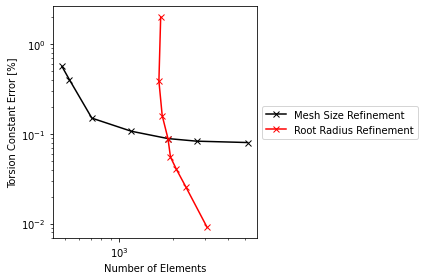

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sectionproperties.pre.sections as sections
from sectionproperties.analysis.cross_section import Section

# define mesh sizes
mesh_size_list = [50, 20, 10, 5, 3, 2, 1]
nr_list = [4, 8, 12, 16, 20, 24, 32, 64]

# initialise result lists
mesh_results = []
mesh_elements = []
nr_results = []
nr_elements = []

# calculate reference solution
geometry = sections.i_section(d=203, b=133, t_f=7.8, t_w=5.8, r=8.9, n_r=64)
geometry.create_mesh(mesh_sizes=[0.5])  # create mesh
section = Section(geometry)  # create a Section object
section.calculate_geometric_properties()
section.calculate_warping_properties()
j_reference = section.get_j()  # get the torsion constant

# run through mesh_sizes with n_r = 16
for mesh_size in mesh_size_list:
    geometry = sections.i_section(d=203, b=133, t_f=7.8, t_w=5.8, r=8.9, n_r=16)
    geometry.create_mesh(mesh_sizes=[mesh_size])  # create mesh
    section = Section(geometry)  # create a Section object
    section.calculate_geometric_properties()
    section.calculate_warping_properties()

    mesh_elements.append(len(section.elements))
    mesh_results.append(section.get_j())

# run through n_r with mesh_size = 3
for n_r in nr_list:
    geometry = sections.i_section(d=203, b=133, t_f=7.8, t_w=5.8, r=8.9, n_r=n_r)
    geometry.create_mesh(mesh_sizes=[3])  # create mesh
    section = Section(geometry)  # create a Section object
    section.calculate_geometric_properties()
    section.calculate_warping_properties()

    nr_elements.append(len(section.elements))
    nr_results.append(section.get_j())

# convert results to a numpy array
mesh_results = np.array(mesh_results)
nr_results = np.array(nr_results)

# compute the error
mesh_error_vals = (mesh_results - j_reference) / mesh_results * 100
nr_error_vals = (nr_results - j_reference) / nr_results * 100

# plot the results
(fig, ax) = plt.subplots()
ax.loglog(mesh_elements, mesh_error_vals, 'kx-', label='Mesh Size Refinement')
ax.loglog(nr_elements, nr_error_vals, 'rx-', label='Root Radius Refinement')
plt.xlabel("Number of Elements")
plt.ylabel("Torsion Constant Error [%]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()